**自然言語処理：RNN**



iters:0
Loss:0.7633036960087143
Pred:[1 1 1 1 1 1 1 1]
True:[1 0 1 1 1 1 1 0]
103 + 87 = 255
------------
iters:100
Loss:0.990964345876345
Pred:[0 0 0 0 0 0 0 0]
True:[1 0 0 1 0 1 0 0]
27 + 121 = 0
------------
iters:200
Loss:0.9426096962975175
Pred:[1 1 1 1 1 1 1 1]
True:[1 0 0 1 0 1 0 1]
122 + 27 = 255
------------
iters:300
Loss:0.8150048256188833
Pred:[0 0 0 0 0 0 0 0]
True:[1 0 0 0 0 0 0 0]
121 + 7 = 0
------------
iters:400
Loss:1.005366508353204
Pred:[0 0 0 0 0 0 0 0]
True:[1 0 1 1 0 1 1 0]
80 + 102 = 0
------------
iters:500
Loss:1.0367606254218482
Pred:[0 0 0 0 0 0 0 0]
True:[1 1 1 0 1 1 0 0]
114 + 122 = 0
------------
iters:600
Loss:0.9603189525621176
Pred:[0 0 0 0 0 0 0 0]
True:[1 0 0 0 0 0 1 0]
61 + 69 = 0
------------
iters:700
Loss:0.9951796376113167
Pred:[0 1 0 1 1 1 0 1]
True:[1 0 0 1 1 1 0 1]
46 + 111 = 93
------------
iters:800
Loss:0.9377259672693178
Pred:[1 1 1 1 1 1 1 1]
True:[0 1 1 0 1 1 0 1]
13 + 96 = 255
------------
iters:900
Loss:0.8279912995325465
Pred:[1 1 1

iters:7600
Loss:0.0012209862640009826
Pred:[1 0 1 1 1 0 1 0]
True:[1 0 1 1 1 0 1 0]
70 + 116 = 186
------------
iters:7700
Loss:0.001628120165300066
Pred:[1 0 0 1 0 0 0 0]
True:[1 0 0 1 0 0 0 0]
87 + 57 = 144
------------
iters:7800
Loss:0.00041351498604044827
Pred:[1 0 1 0 1 0 1 0]
True:[1 0 1 0 1 0 1 0]
89 + 81 = 170
------------
iters:7900
Loss:0.00018630826809995092
Pred:[0 0 0 1 1 1 1 0]
True:[0 0 0 1 1 1 1 0]
25 + 5 = 30
------------
iters:8000
Loss:0.0010592936463590288
Pred:[0 1 0 1 1 0 1 1]
True:[0 1 0 1 1 0 1 1]
14 + 77 = 91
------------
iters:8100
Loss:0.0015317135193471827
Pred:[1 1 1 0 0 0 1 0]
True:[1 1 1 0 0 0 1 0]
116 + 110 = 226
------------
iters:8200
Loss:0.0017165261648664628
Pred:[1 0 0 0 1 0 0 0]
True:[1 0 0 0 1 0 0 0]
106 + 30 = 136
------------
iters:8300
Loss:0.0007193185278763738
Pred:[0 1 0 1 0 1 1 0]
True:[0 1 0 1 0 1 1 0]
22 + 64 = 86
------------
iters:8400
Loss:0.00025249397476176415
Pred:[0 0 1 0 1 1 0 0]
True:[0 0 1 0 1 1 0 0]
43 + 1 = 44
------------
i

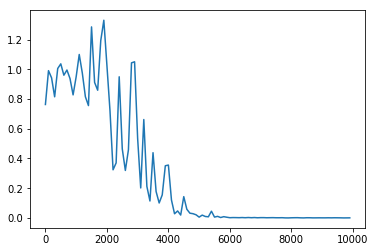

In [7]:
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from common import functions
import matplotlib.pyplot as plt


def d_tanh(x):
    return 1/(np.cosh(x) ** 2)

# データを用意
# 2進数の桁数
binary_dim = 8
# 最大値 + 1
largest_number = pow(2, binary_dim)
# largest_numberまで2進数を用意
binary = np.unpackbits(np.array([range(largest_number)],dtype=np.uint8).T,axis=1)

input_layer_size = 2
hidden_layer_size = 16
output_layer_size = 1

weight_init_std = 1
learning_rate = 0.1

iters_num = 10000
plot_interval = 100

# ウェイト初期化
# He
W_in = np.random.randn(input_layer_size, hidden_layer_size) / (np.sqrt(input_layer_size)) * np.sqrt(2)
W_out = np.random.randn(hidden_layer_size, output_layer_size) / (np.sqrt(hidden_layer_size)) * np.sqrt(2)
W = np.random.randn(hidden_layer_size, hidden_layer_size) / (np.sqrt(hidden_layer_size)) * np.sqrt(2)


# 勾配
W_in_grad = np.zeros_like(W_in)
W_out_grad = np.zeros_like(W_out)
W_grad = np.zeros_like(W)

u = np.zeros((hidden_layer_size, binary_dim + 1))
z = np.zeros((hidden_layer_size, binary_dim + 1))
y = np.zeros((output_layer_size, binary_dim))

delta_out = np.zeros((output_layer_size, binary_dim))
delta = np.zeros((hidden_layer_size, binary_dim + 1))

all_losses = []

for i in range(iters_num):
    
    # A, B初期化 (a + b = d)
    a_int = np.random.randint(largest_number/2)
    a_bin = binary[a_int] # binary encoding
    b_int = np.random.randint(largest_number/2)
    b_bin = binary[b_int] # binary encoding
    
    # 正解データ
    d_int = a_int + b_int
    d_bin = binary[d_int]
    
    # 出力バイナリ
    out_bin = np.zeros_like(d_bin)
    
    # 時系列全体の誤差
    all_loss = 0    
    
    # 時系列ループ
    for t in range(binary_dim):
        # 入力値
        X = np.array([a_bin[ - t - 1], b_bin[ - t - 1]]).reshape(1, -1)
        # 時刻tにおける正解データ
        dd = np.array([d_bin[binary_dim - t - 1]])
        
        u[:,t+1] = np.dot(X, W_in) + np.dot(z[:,t].reshape(1, -1), W)
        z[:,t+1] = functions.sigmoid(u[:,t+1])
        y[:,t] = functions.sigmoid(np.dot(z[:,t+1].reshape(1, -1), W_out))


        #誤差
        loss = functions.least_square(dd, y[:,t])
        
        delta_out[:,t] = functions.d_least_square(dd, y[:,t]) * functions.d_sigmoid(y[:,t])        
        
        all_loss += loss

        out_bin[binary_dim - t - 1] = np.round(y[:,t])
    
    
    for t in range(binary_dim)[::-1]:
        X = np.array([a_bin[-t-1],b_bin[-t-1]]).reshape(1, -1)        

        delta[:,t] = (np.dot(delta[:,t+1].T, W.T) + np.dot(delta_out[:,t].T, W_out.T)) * functions.d_sigmoid(u[:,t+1])


        # 勾配更新
        W_out_grad += np.dot(z[:,t+1].reshape(-1,1), delta_out[:,t].reshape(-1,1))
        W_grad += np.dot(z[:,t].reshape(-1,1), delta[:,t].reshape(1,-1))
        W_in_grad += np.dot(X.T, delta[:,t].reshape(1,-1))
    
    # 勾配適用
    W_in -= learning_rate * W_in_grad
    W_out -= learning_rate * W_out_grad
    W -= learning_rate * W_grad
    
    W_in_grad *= 0
    W_out_grad *= 0
    W_grad *= 0
    

    if(i % plot_interval == 0):
        all_losses.append(all_loss)        
        print("iters:" + str(i))
        print("Loss:" + str(all_loss))
        print("Pred:" + str(out_bin))
        print("True:" + str(d_bin))
        out_int = 0
        for index,x in enumerate(reversed(out_bin)):
            out_int += x * pow(2, index)
        print(str(a_int) + " + " + str(b_int) + " = " + str(out_int))
        print("------------")

lists = range(0, iters_num, plot_interval)
plt.plot(lists, all_losses, label="loss")
plt.show()